In [1]:
# http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.covariance import GraphLassoCV
from sklearn.metrics import mutual_info_score

In [2]:
# load the fMRI data:
df1  = pd.read_csv("100307.csv")
data  = df1.values
Nvars = data.shape[1]

In [3]:
# define partial correlation through OLS:
from scipy import stats, linalg
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr

    return P_corr

In [8]:
# compute functional connectivity in multiple ways:
# Natalia's part:

# [1] PEARSON'S R:
pearsonr = np.zeros((Nvars,Nvars))
pearsonr_p = np.zeros((Nvars,Nvars))
for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        (pearsonr[ind1,ind2],pearsonr_p[ind1,ind2]) = scipy.stats.pearsonr(data[:,ind1], data[:,ind2])

# [2A] PARTIAL CORRELATION THROUGH OLS REGRESSION:
# warning: this one is slooooow:
# partial_correlation1 = partial_corr(data)

# [2B] PARTIAL CORRELATION THROUGH INVERSE COVARIANCE:
# partial_correlation = partial_corr(data)
covariance_matrix = np.cov(np.transpose(data))
inv_cov = np.linalg.inv(covariance_matrix)
partial_correlation2 = np.zeros((Nvars,Nvars))
for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        partial_correlation2[ind1,ind2] = - inv_cov[ind1,ind2]/np.sqrt((inv_cov[ind1,ind1])*(inv_cov[ind2,ind2]))
      
# [3] MUTUAL INFORMATION:
mutual_information = np.zeros((Nvars,Nvars))
for ind1 in range(Nvars):
    for ind2 in range(Nvars):
        print str(ind1) + ' ' + str(ind2)
        mutual_information[ind1,ind2] = mutual_info_score(data[:,ind1], data[:,ind2])

#estimator = GraphLassoCV()
#fc3 = estimator.fit(data)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25


9 64
9 65
9 66
9 67
9 68
9 69
9 70
9 71
9 72
9 73
9 74
9 75
9 76
9 77
9 78
9 79
9 80
9 81
9 82
9 83
9 84
9 85
9 86
9 87
9 88
9 89
9 90
9 91
9 92
9 93
9 94
9 95
9 96
9 97
9 98
9 99
9 100
9 101
9 102
9 103
9 104
9 105
9 106
9 107
9 108
9 109
9 110
9 111
9 112
9 113
9 114
9 115
9 116
9 117
9 118
9 119
9 120
9 121
9 122
9 123
9 124
9 125
9 126
9 127
9 128
9 129
9 130
9 131
9 132
9 133
9 134
9 135
9 136
9 137
9 138
9 139
9 140
9 141
9 142
9 143
9 144
9 145
9 146
9 147
9 148
9 149
9 150
9 151
9 152
9 153
9 154
9 155
9 156
9 157
9 158
9 159
9 160
9 161
9 162
9 163
9 164
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10

17 84
17 85
17 86
17 87
17 88
17 89
17 90
17 91
17 92
17 93
17 94
17 95
17 96
17 97
17 98
17 99
17 100
17 101
17 102
17 103
17 104
17 105
17 106
17 107
17 108
17 109
17 110
17 111
17 112
17 113
17 114
17 115
17 116
17 117
17 118
17 119
17 120
17 121
17 122
17 123
17 124
17 125
17 126
17 127
17 128
17 129
17 130
17 131
17 132
17 133
17 134
17 135
17 136
17 137
17 138
17 139
17 140
17 141
17 142
17 143
17 144
17 145
17 146
17 147
17 148
17 149
17 150
17 151
17 152
17 153
17 154
17 155
17 156
17 157
17 158
17 159
17 160
17 161
17 162
17 163
17 164
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
18 33
18 34
18 35
18 36
18 37
18 38
18 39
18 40
18 41
18 42
18 43
18 44
18 45
18 46
18 47
18 48
18 49
18 50
18 51
18 52
18 53
18 54
18 55
18 56
18 57
18 58
18 59
18 60
18 61
18 62
18 63
18 64
18 65
18 66
18 67
18 68
18 69
18 70
18 71
18 72
18 73
18 74
18 75
18 

25 98
25 99
25 100
25 101
25 102
25 103
25 104
25 105
25 106
25 107
25 108
25 109
25 110
25 111
25 112
25 113
25 114
25 115
25 116
25 117
25 118
25 119
25 120
25 121
25 122
25 123
25 124
25 125
25 126
25 127
25 128
25 129
25 130
25 131
25 132
25 133
25 134
25 135
25 136
25 137
25 138
25 139
25 140
25 141
25 142
25 143
25 144
25 145
25 146
25 147
25 148
25 149
25 150
25 151
25 152
25 153
25 154
25 155
25 156
25 157
25 158
25 159
25 160
25 161
25 162
25 163
25 164
26 0
26 1
26 2
26 3
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
26 15
26 16
26 17
26 18
26 19
26 20
26 21
26 22
26 23
26 24
26 25
26 26
26 27
26 28
26 29
26 30
26 31
26 32
26 33
26 34
26 35
26 36
26 37
26 38
26 39
26 40
26 41
26 42
26 43
26 44
26 45
26 46
26 47
26 48
26 49
26 50
26 51
26 52
26 53
26 54
26 55
26 56
26 57
26 58
26 59
26 60
26 61
26 62
26 63
26 64
26 65
26 66
26 67
26 68
26 69
26 70
26 71
26 72
26 73
26 74
26 75
26 76
26 77
26 78
26 79
26 80
26 81
26 82
26 83
26 84
26 85
26 86
26 87
26 88
26 89
26 

33 89
33 90
33 91
33 92
33 93
33 94
33 95
33 96
33 97
33 98
33 99
33 100
33 101
33 102
33 103
33 104
33 105
33 106
33 107
33 108
33 109
33 110
33 111
33 112
33 113
33 114
33 115
33 116
33 117
33 118
33 119
33 120
33 121
33 122
33 123
33 124
33 125
33 126
33 127
33 128
33 129
33 130
33 131
33 132
33 133
33 134
33 135
33 136
33 137
33 138
33 139
33 140
33 141
33 142
33 143
33 144
33 145
33 146
33 147
33 148
33 149
33 150
33 151
33 152
33 153
33 154
33 155
33 156
33 157
33 158
33 159
33 160
33 161
33 162
33 163
33 164
34 0
34 1
34 2
34 3
34 4
34 5
34 6
34 7
34 8
34 9
34 10
34 11
34 12
34 13
34 14
34 15
34 16
34 17
34 18
34 19
34 20
34 21
34 22
34 23
34 24
34 25
34 26
34 27
34 28
34 29
34 30
34 31
34 32
34 33
34 34
34 35
34 36
34 37
34 38
34 39
34 40
34 41
34 42
34 43
34 44
34 45
34 46
34 47
34 48
34 49
34 50
34 51
34 52
34 53
34 54
34 55
34 56
34 57
34 58
34 59
34 60
34 61
34 62
34 63
34 64
34 65
34 66
34 67
34 68
34 69
34 70
34 71
34 72
34 73
34 74
34 75
34 76
34 77
34 78
34 79
34 80
34 

41 100
41 101
41 102
41 103
41 104
41 105
41 106
41 107
41 108
41 109
41 110
41 111
41 112
41 113
41 114
41 115
41 116
41 117
41 118
41 119
41 120
41 121
41 122
41 123
41 124
41 125
41 126
41 127
41 128
41 129
41 130
41 131
41 132
41 133
41 134
41 135
41 136
41 137
41 138
41 139
41 140
41 141
41 142
41 143
41 144
41 145
41 146
41 147
41 148
41 149
41 150
41 151
41 152
41 153
41 154
41 155
41 156
41 157
41 158
41 159
41 160
41 161
41 162
41 163
41 164
42 0
42 1
42 2
42 3
42 4
42 5
42 6
42 7
42 8
42 9
42 10
42 11
42 12
42 13
42 14
42 15
42 16
42 17
42 18
42 19
42 20
42 21
42 22
42 23
42 24
42 25
42 26
42 27
42 28
42 29
42 30
42 31
42 32
42 33
42 34
42 35
42 36
42 37
42 38
42 39
42 40
42 41
42 42
42 43
42 44
42 45
42 46
42 47
42 48
42 49
42 50
42 51
42 52
42 53
42 54
42 55
42 56
42 57
42 58
42 59
42 60
42 61
42 62
42 63
42 64
42 65
42 66
42 67
42 68
42 69
42 70
42 71
42 72
42 73
42 74
42 75
42 76
42 77
42 78
42 79
42 80
42 81
42 82
42 83
42 84
42 85
42 86
42 87
42 88
42 89
42 90
42 91
42 

49 83
49 84
49 85
49 86
49 87
49 88
49 89
49 90
49 91
49 92
49 93
49 94
49 95
49 96
49 97
49 98
49 99
49 100
49 101
49 102
49 103
49 104
49 105
49 106
49 107
49 108
49 109
49 110
49 111
49 112
49 113
49 114
49 115
49 116
49 117
49 118
49 119
49 120
49 121
49 122
49 123
49 124
49 125
49 126
49 127
49 128
49 129
49 130
49 131
49 132
49 133
49 134
49 135
49 136
49 137
49 138
49 139
49 140
49 141
49 142
49 143
49 144
49 145
49 146
49 147
49 148
49 149
49 150
49 151
49 152
49 153
49 154
49 155
49 156
49 157
49 158
49 159
49 160
49 161
49 162
49 163
49 164
50 0
50 1
50 2
50 3
50 4
50 5
50 6
50 7
50 8
50 9
50 10
50 11
50 12
50 13
50 14
50 15
50 16
50 17
50 18
50 19
50 20
50 21
50 22
50 23
50 24
50 25
50 26
50 27
50 28
50 29
50 30
50 31
50 32
50 33
50 34
50 35
50 36
50 37
50 38
50 39
50 40
50 41
50 42
50 43
50 44
50 45
50 46
50 47
50 48
50 49
50 50
50 51
50 52
50 53
50 54
50 55
50 56
50 57
50 58
50 59
50 60
50 61
50 62
50 63
50 64
50 65
50 66
50 67
50 68
50 69
50 70
50 71
50 72
50 73
50 74
50 

57 71
57 72
57 73
57 74
57 75
57 76
57 77
57 78
57 79
57 80
57 81
57 82
57 83
57 84
57 85
57 86
57 87
57 88
57 89
57 90
57 91
57 92
57 93
57 94
57 95
57 96
57 97
57 98
57 99
57 100
57 101
57 102
57 103
57 104
57 105
57 106
57 107
57 108
57 109
57 110
57 111
57 112
57 113
57 114
57 115
57 116
57 117
57 118
57 119
57 120
57 121
57 122
57 123
57 124
57 125
57 126
57 127
57 128
57 129
57 130
57 131
57 132
57 133
57 134
57 135
57 136
57 137
57 138
57 139
57 140
57 141
57 142
57 143
57 144
57 145
57 146
57 147
57 148
57 149
57 150
57 151
57 152
57 153
57 154
57 155
57 156
57 157
57 158
57 159
57 160
57 161
57 162
57 163
57 164
58 0
58 1
58 2
58 3
58 4
58 5
58 6
58 7
58 8
58 9
58 10
58 11
58 12
58 13
58 14
58 15
58 16
58 17
58 18
58 19
58 20
58 21
58 22
58 23
58 24
58 25
58 26
58 27
58 28
58 29
58 30
58 31
58 32
58 33
58 34
58 35
58 36
58 37
58 38
58 39
58 40
58 41
58 42
58 43
58 44
58 45
58 46
58 47
58 48
58 49
58 50
58 51
58 52
58 53
58 54
58 55
58 56
58 57
58 58
58 59
58 60
58 61
58 62
58 

65 74
65 75
65 76
65 77
65 78
65 79
65 80
65 81
65 82
65 83
65 84
65 85
65 86
65 87
65 88
65 89
65 90
65 91
65 92
65 93
65 94
65 95
65 96
65 97
65 98
65 99
65 100
65 101
65 102
65 103
65 104
65 105
65 106
65 107
65 108
65 109
65 110
65 111
65 112
65 113
65 114
65 115
65 116
65 117
65 118
65 119
65 120
65 121
65 122
65 123
65 124
65 125
65 126
65 127
65 128
65 129
65 130
65 131
65 132
65 133
65 134
65 135
65 136
65 137
65 138
65 139
65 140
65 141
65 142
65 143
65 144
65 145
65 146
65 147
65 148
65 149
65 150
65 151
65 152
65 153
65 154
65 155
65 156
65 157
65 158
65 159
65 160
65 161
65 162
65 163
65 164
66 0
66 1
66 2
66 3
66 4
66 5
66 6
66 7
66 8
66 9
66 10
66 11
66 12
66 13
66 14
66 15
66 16
66 17
66 18
66 19
66 20
66 21
66 22
66 23
66 24
66 25
66 26
66 27
66 28
66 29
66 30
66 31
66 32
66 33
66 34
66 35
66 36
66 37
66 38
66 39
66 40
66 41
66 42
66 43
66 44
66 45
66 46
66 47
66 48
66 49
66 50
66 51
66 52
66 53
66 54
66 55
66 56
66 57
66 58
66 59
66 60
66 61
66 62
66 63
66 64
66 65
66 

73 73
73 74
73 75
73 76
73 77
73 78
73 79
73 80
73 81
73 82
73 83
73 84
73 85
73 86
73 87
73 88
73 89
73 90
73 91
73 92
73 93
73 94
73 95
73 96
73 97
73 98
73 99
73 100
73 101
73 102
73 103
73 104
73 105
73 106
73 107
73 108
73 109
73 110
73 111
73 112
73 113
73 114
73 115
73 116
73 117
73 118
73 119
73 120
73 121
73 122
73 123
73 124
73 125
73 126
73 127
73 128
73 129
73 130
73 131
73 132
73 133
73 134
73 135
73 136
73 137
73 138
73 139
73 140
73 141
73 142
73 143
73 144
73 145
73 146
73 147
73 148
73 149
73 150
73 151
73 152
73 153
73 154
73 155
73 156
73 157
73 158
73 159
73 160
73 161
73 162
73 163
73 164
74 0
74 1
74 2
74 3
74 4
74 5
74 6
74 7
74 8
74 9
74 10
74 11
74 12
74 13
74 14
74 15
74 16
74 17
74 18
74 19
74 20
74 21
74 22
74 23
74 24
74 25
74 26
74 27
74 28
74 29
74 30
74 31
74 32
74 33
74 34
74 35
74 36
74 37
74 38
74 39
74 40
74 41
74 42
74 43
74 44
74 45
74 46
74 47
74 48
74 49
74 50
74 51
74 52
74 53
74 54
74 55
74 56
74 57
74 58
74 59
74 60
74 61
74 62
74 63
74 64
74 

81 57
81 58
81 59
81 60
81 61
81 62
81 63
81 64
81 65
81 66
81 67
81 68
81 69
81 70
81 71
81 72
81 73
81 74
81 75
81 76
81 77
81 78
81 79
81 80
81 81
81 82
81 83
81 84
81 85
81 86
81 87
81 88
81 89
81 90
81 91
81 92
81 93
81 94
81 95
81 96
81 97
81 98
81 99
81 100
81 101
81 102
81 103
81 104
81 105
81 106
81 107
81 108
81 109
81 110
81 111
81 112
81 113
81 114
81 115
81 116
81 117
81 118
81 119
81 120
81 121
81 122
81 123
81 124
81 125
81 126
81 127
81 128
81 129
81 130
81 131
81 132
81 133
81 134
81 135
81 136
81 137
81 138
81 139
81 140
81 141
81 142
81 143
81 144
81 145
81 146
81 147
81 148
81 149
81 150
81 151
81 152
81 153
81 154
81 155
81 156
81 157
81 158
81 159
81 160
81 161
81 162
81 163
81 164
82 0
82 1
82 2
82 3
82 4
82 5
82 6
82 7
82 8
82 9
82 10
82 11
82 12
82 13
82 14
82 15
82 16
82 17
82 18
82 19
82 20
82 21
82 22
82 23
82 24
82 25
82 26
82 27
82 28
82 29
82 30
82 31
82 32
82 33
82 34
82 35
82 36
82 37
82 38
82 39
82 40
82 41
82 42
82 43
82 44
82 45
82 46
82 47
82 48
82 

89 63
89 64
89 65
89 66
89 67
89 68
89 69
89 70
89 71
89 72
89 73
89 74
89 75
89 76
89 77
89 78
89 79
89 80
89 81
89 82
89 83
89 84
89 85
89 86
89 87
89 88
89 89
89 90
89 91
89 92
89 93
89 94
89 95
89 96
89 97
89 98
89 99
89 100
89 101
89 102
89 103
89 104
89 105
89 106
89 107
89 108
89 109
89 110
89 111
89 112
89 113
89 114
89 115
89 116
89 117
89 118
89 119
89 120
89 121
89 122
89 123
89 124
89 125
89 126
89 127
89 128
89 129
89 130
89 131
89 132
89 133
89 134
89 135
89 136
89 137
89 138
89 139
89 140
89 141
89 142
89 143
89 144
89 145
89 146
89 147
89 148
89 149
89 150
89 151
89 152
89 153
89 154
89 155
89 156
89 157
89 158
89 159
89 160
89 161
89 162
89 163
89 164
90 0
90 1
90 2
90 3
90 4
90 5
90 6
90 7
90 8
90 9
90 10
90 11
90 12
90 13
90 14
90 15
90 16
90 17
90 18
90 19
90 20
90 21
90 22
90 23
90 24
90 25
90 26
90 27
90 28
90 29
90 30
90 31
90 32
90 33
90 34
90 35
90 36
90 37
90 38
90 39
90 40
90 41
90 42
90 43
90 44
90 45
90 46
90 47
90 48
90 49
90 50
90 51
90 52
90 53
90 54
90 

97 66
97 67
97 68
97 69
97 70
97 71
97 72
97 73
97 74
97 75
97 76
97 77
97 78
97 79
97 80
97 81
97 82
97 83
97 84
97 85
97 86
97 87
97 88
97 89
97 90
97 91
97 92
97 93
97 94
97 95
97 96
97 97
97 98
97 99
97 100
97 101
97 102
97 103
97 104
97 105
97 106
97 107
97 108
97 109
97 110
97 111
97 112
97 113
97 114
97 115
97 116
97 117
97 118
97 119
97 120
97 121
97 122
97 123
97 124
97 125
97 126
97 127
97 128
97 129
97 130
97 131
97 132
97 133
97 134
97 135
97 136
97 137
97 138
97 139
97 140
97 141
97 142
97 143
97 144
97 145
97 146
97 147
97 148
97 149
97 150
97 151
97 152
97 153
97 154
97 155
97 156
97 157
97 158
97 159
97 160
97 161
97 162
97 163
97 164
98 0
98 1
98 2
98 3
98 4
98 5
98 6
98 7
98 8
98 9
98 10
98 11
98 12
98 13
98 14
98 15
98 16
98 17
98 18
98 19
98 20
98 21
98 22
98 23
98 24
98 25
98 26
98 27
98 28
98 29
98 30
98 31
98 32
98 33
98 34
98 35
98 36
98 37
98 38
98 39
98 40
98 41
98 42
98 43
98 44
98 45
98 46
98 47
98 48
98 49
98 50
98 51
98 52
98 53
98 54
98 55
98 56
98 57
98 

104 102
104 103
104 104
104 105
104 106
104 107
104 108
104 109
104 110
104 111
104 112
104 113
104 114
104 115
104 116
104 117
104 118
104 119
104 120
104 121
104 122
104 123
104 124
104 125
104 126
104 127
104 128
104 129
104 130
104 131
104 132
104 133
104 134
104 135
104 136
104 137
104 138
104 139
104 140
104 141
104 142
104 143
104 144
104 145
104 146
104 147
104 148
104 149
104 150
104 151
104 152
104 153
104 154
104 155
104 156
104 157
104 158
104 159
104 160
104 161
104 162
104 163
104 164
105 0
105 1
105 2
105 3
105 4
105 5
105 6
105 7
105 8
105 9
105 10
105 11
105 12
105 13
105 14
105 15
105 16
105 17
105 18
105 19
105 20
105 21
105 22
105 23
105 24
105 25
105 26
105 27
105 28
105 29
105 30
105 31
105 32
105 33
105 34
105 35
105 36
105 37
105 38
105 39
105 40
105 41
105 42
105 43
105 44
105 45
105 46
105 47
105 48
105 49
105 50
105 51
105 52
105 53
105 54
105 55
105 56
105 57
105 58
105 59
105 60
105 61
105 62
105 63
105 64
105 65
105 66
105 67
105 68
105 69
105 70
105 71
10

111 67
111 68
111 69
111 70
111 71
111 72
111 73
111 74
111 75
111 76
111 77
111 78
111 79
111 80
111 81
111 82
111 83
111 84
111 85
111 86
111 87
111 88
111 89
111 90
111 91
111 92
111 93
111 94
111 95
111 96
111 97
111 98
111 99
111 100
111 101
111 102
111 103
111 104
111 105
111 106
111 107
111 108
111 109
111 110
111 111
111 112
111 113
111 114
111 115
111 116
111 117
111 118
111 119
111 120
111 121
111 122
111 123
111 124
111 125
111 126
111 127
111 128
111 129
111 130
111 131
111 132
111 133
111 134
111 135
111 136
111 137
111 138
111 139
111 140
111 141
111 142
111 143
111 144
111 145
111 146
111 147
111 148
111 149
111 150
111 151
111 152
111 153
111 154
111 155
111 156
111 157
111 158
111 159
111 160
111 161
111 162
111 163
111 164
112 0
112 1
112 2
112 3
112 4
112 5
112 6
112 7
112 8
112 9
112 10
112 11
112 12
112 13
112 14
112 15
112 16
112 17
112 18
112 19
112 20
112 21
112 22
112 23
112 24
112 25
112 26
112 27
112 28
112 29
112 30
112 31
112 32
112 33
112 34
112 35
112 36


118 33
118 34
118 35
118 36
118 37
118 38
118 39
118 40
118 41
118 42
118 43
118 44
118 45
118 46
118 47
118 48
118 49
118 50
118 51
118 52
118 53
118 54
118 55
118 56
118 57
118 58
118 59
118 60
118 61
118 62
118 63
118 64
118 65
118 66
118 67
118 68
118 69
118 70
118 71
118 72
118 73
118 74
118 75
118 76
118 77
118 78
118 79
118 80
118 81
118 82
118 83
118 84
118 85
118 86
118 87
118 88
118 89
118 90
118 91
118 92
118 93
118 94
118 95
118 96
118 97
118 98
118 99
118 100
118 101
118 102
118 103
118 104
118 105
118 106
118 107
118 108
118 109
118 110
118 111
118 112
118 113
118 114
118 115
118 116
118 117
118 118
118 119
118 120
118 121
118 122
118 123
118 124
118 125
118 126
118 127
118 128
118 129
118 130
118 131
118 132
118 133
118 134
118 135
118 136
118 137
118 138
118 139
118 140
118 141
118 142
118 143
118 144
118 145
118 146
118 147
118 148
118 149
118 150
118 151
118 152
118 153
118 154
118 155
118 156
118 157
118 158
118 159
118 160
118 161
118 162
118 163
118 164
119 0
119 1

125 31
125 32
125 33
125 34
125 35
125 36
125 37
125 38
125 39
125 40
125 41
125 42
125 43
125 44
125 45
125 46
125 47
125 48
125 49
125 50
125 51
125 52
125 53
125 54
125 55
125 56
125 57
125 58
125 59
125 60
125 61
125 62
125 63
125 64
125 65
125 66
125 67
125 68
125 69
125 70
125 71
125 72
125 73
125 74
125 75
125 76
125 77
125 78
125 79
125 80
125 81
125 82
125 83
125 84
125 85
125 86
125 87
125 88
125 89
125 90
125 91
125 92
125 93
125 94
125 95
125 96
125 97
125 98
125 99
125 100
125 101
125 102
125 103
125 104
125 105
125 106
125 107
125 108
125 109
125 110
125 111
125 112
125 113
125 114
125 115
125 116
125 117
125 118
125 119
125 120
125 121
125 122
125 123
125 124
125 125
125 126
125 127
125 128
125 129
125 130
125 131
125 132
125 133
125 134
125 135
125 136
125 137
125 138
125 139
125 140
125 141
125 142
125 143
125 144
125 145
125 146
125 147
125 148
125 149
125 150
125 151
125 152
125 153
125 154
125 155
125 156
125 157
125 158
125 159
125 160
125 161
125 162
125 163
125 1

131 163
131 164
132 0
132 1
132 2
132 3
132 4
132 5
132 6
132 7
132 8
132 9
132 10
132 11
132 12
132 13
132 14
132 15
132 16
132 17
132 18
132 19
132 20
132 21
132 22
132 23
132 24
132 25
132 26
132 27
132 28
132 29
132 30
132 31
132 32
132 33
132 34
132 35
132 36
132 37
132 38
132 39
132 40
132 41
132 42
132 43
132 44
132 45
132 46
132 47
132 48
132 49
132 50
132 51
132 52
132 53
132 54
132 55
132 56
132 57
132 58
132 59
132 60
132 61
132 62
132 63
132 64
132 65
132 66
132 67
132 68
132 69
132 70
132 71
132 72
132 73
132 74
132 75
132 76
132 77
132 78
132 79
132 80
132 81
132 82
132 83
132 84
132 85
132 86
132 87
132 88
132 89
132 90
132 91
132 92
132 93
132 94
132 95
132 96
132 97
132 98
132 99
132 100
132 101
132 102
132 103
132 104
132 105
132 106
132 107
132 108
132 109
132 110
132 111
132 112
132 113
132 114
132 115
132 116
132 117
132 118
132 119
132 120
132 121
132 122
132 123
132 124
132 125
132 126
132 127
132 128
132 129
132 130
132 131
132 132
132 133
132 134
132 135
132 13

138 134
138 135
138 136
138 137
138 138
138 139
138 140
138 141
138 142
138 143
138 144
138 145
138 146
138 147
138 148
138 149
138 150
138 151
138 152
138 153
138 154
138 155
138 156
138 157
138 158
138 159
138 160
138 161
138 162
138 163
138 164
139 0
139 1
139 2
139 3
139 4
139 5
139 6
139 7
139 8
139 9
139 10
139 11
139 12
139 13
139 14
139 15
139 16
139 17
139 18
139 19
139 20
139 21
139 22
139 23
139 24
139 25
139 26
139 27
139 28
139 29
139 30
139 31
139 32
139 33
139 34
139 35
139 36
139 37
139 38
139 39
139 40
139 41
139 42
139 43
139 44
139 45
139 46
139 47
139 48
139 49
139 50
139 51
139 52
139 53
139 54
139 55
139 56
139 57
139 58
139 59
139 60
139 61
139 62
139 63
139 64
139 65
139 66
139 67
139 68
139 69
139 70
139 71
139 72
139 73
139 74
139 75
139 76
139 77
139 78
139 79
139 80
139 81
139 82
139 83
139 84
139 85
139 86
139 87
139 88
139 89
139 90
139 91
139 92
139 93
139 94
139 95
139 96
139 97
139 98
139 99
139 100
139 101
139 102
139 103
139 104
139 105
139 106
139 10

145 102
145 103
145 104
145 105
145 106
145 107
145 108
145 109
145 110
145 111
145 112
145 113
145 114
145 115
145 116
145 117
145 118
145 119
145 120
145 121
145 122
145 123
145 124
145 125
145 126
145 127
145 128
145 129
145 130
145 131
145 132
145 133
145 134
145 135
145 136
145 137
145 138
145 139
145 140
145 141
145 142
145 143
145 144
145 145
145 146
145 147
145 148
145 149
145 150
145 151
145 152
145 153
145 154
145 155
145 156
145 157
145 158
145 159
145 160
145 161
145 162
145 163
145 164
146 0
146 1
146 2
146 3
146 4
146 5
146 6
146 7
146 8
146 9
146 10
146 11
146 12
146 13
146 14
146 15
146 16
146 17
146 18
146 19
146 20
146 21
146 22
146 23
146 24
146 25
146 26
146 27
146 28
146 29
146 30
146 31
146 32
146 33
146 34
146 35
146 36
146 37
146 38
146 39
146 40
146 41
146 42
146 43
146 44
146 45
146 46
146 47
146 48
146 49
146 50
146 51
146 52
146 53
146 54
146 55
146 56
146 57
146 58
146 59
146 60
146 61
146 62
146 63
146 64
146 65
146 66
146 67
146 68
146 69
146 70
146 71
14

152 63
152 64
152 65
152 66
152 67
152 68
152 69
152 70
152 71
152 72
152 73
152 74
152 75
152 76
152 77
152 78
152 79
152 80
152 81
152 82
152 83
152 84
152 85
152 86
152 87
152 88
152 89
152 90
152 91
152 92
152 93
152 94
152 95
152 96
152 97
152 98
152 99
152 100
152 101
152 102
152 103
152 104
152 105
152 106
152 107
152 108
152 109
152 110
152 111
152 112
152 113
152 114
152 115
152 116
152 117
152 118
152 119
152 120
152 121
152 122
152 123
152 124
152 125
152 126
152 127
152 128
152 129
152 130
152 131
152 132
152 133
152 134
152 135
152 136
152 137
152 138
152 139
152 140
152 141
152 142
152 143
152 144
152 145
152 146
152 147
152 148
152 149
152 150
152 151
152 152
152 153
152 154
152 155
152 156
152 157
152 158
152 159
152 160
152 161
152 162
152 163
152 164
153 0
153 1
153 2
153 3
153 4
153 5
153 6
153 7
153 8
153 9
153 10
153 11
153 12
153 13
153 14
153 15
153 16
153 17
153 18
153 19
153 20
153 21
153 22
153 23
153 24
153 25
153 26
153 27
153 28
153 29
153 30
153 31
153 32


159 63
159 64
159 65
159 66
159 67
159 68
159 69
159 70
159 71
159 72
159 73
159 74
159 75
159 76
159 77
159 78
159 79
159 80
159 81
159 82
159 83
159 84
159 85
159 86
159 87
159 88
159 89
159 90
159 91
159 92
159 93
159 94
159 95
159 96
159 97
159 98
159 99
159 100
159 101
159 102
159 103
159 104
159 105
159 106
159 107
159 108
159 109
159 110
159 111
159 112
159 113
159 114
159 115
159 116
159 117
159 118
159 119
159 120
159 121
159 122
159 123
159 124
159 125
159 126
159 127
159 128
159 129
159 130
159 131
159 132
159 133
159 134
159 135
159 136
159 137
159 138
159 139
159 140
159 141
159 142
159 143
159 144
159 145
159 146
159 147
159 148
159 149
159 150
159 151
159 152
159 153
159 154
159 155
159 156
159 157
159 158
159 159
159 160
159 161
159 162
159 163
159 164
160 0
160 1
160 2
160 3
160 4
160 5
160 6
160 7
160 8
160 9
160 10
160 11
160 12
160 13
160 14
160 15
160 16
160 17
160 18
160 19
160 20
160 21
160 22
160 23
160 24
160 25
160 26
160 27
160 28
160 29
160 30
160 31
160 32


In [17]:
a = np.transpose(np.array([1,2,3]))
b = np.transpose(np.array([3,1,4]))
print mutual_information(a,b)

TypeError: 'numpy.ndarray' object is not callable

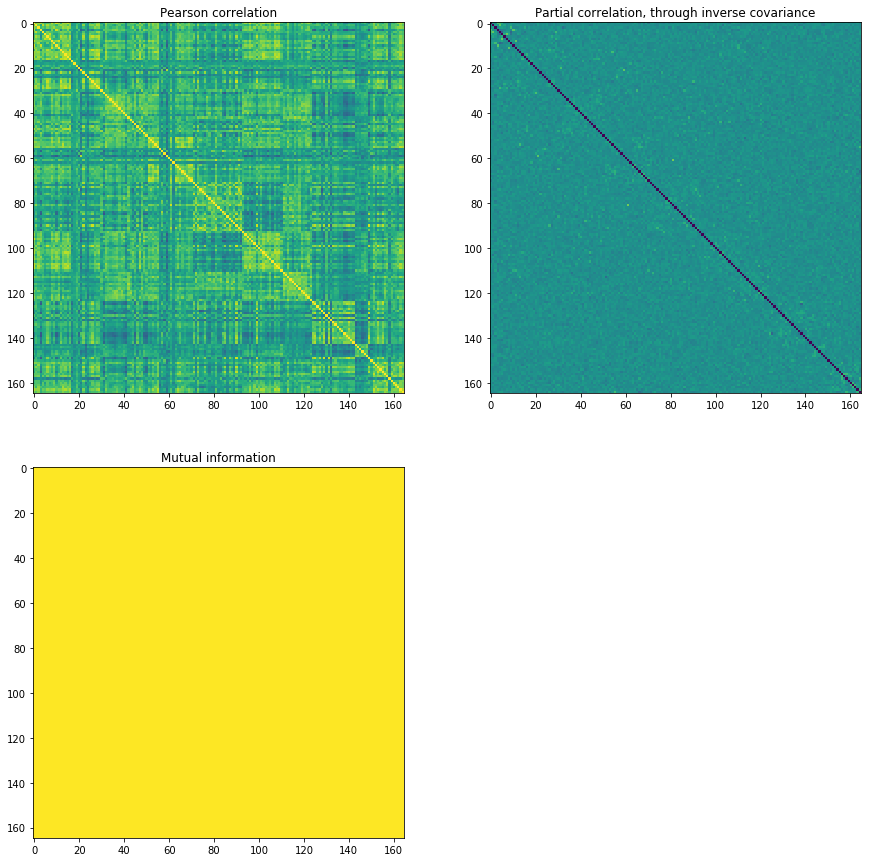

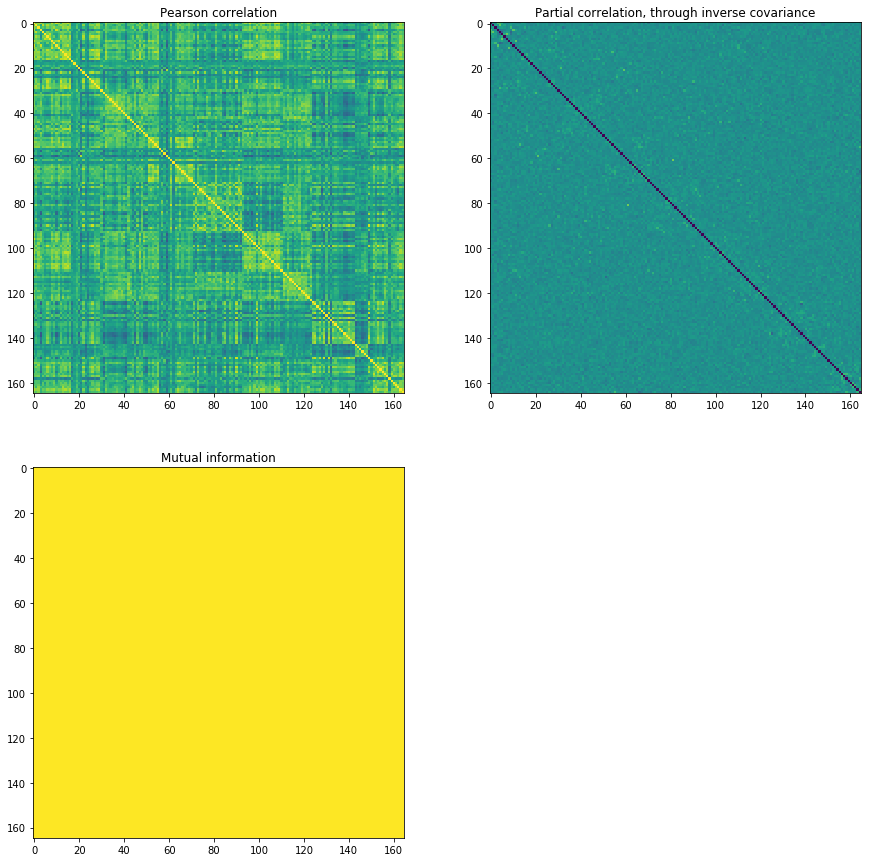

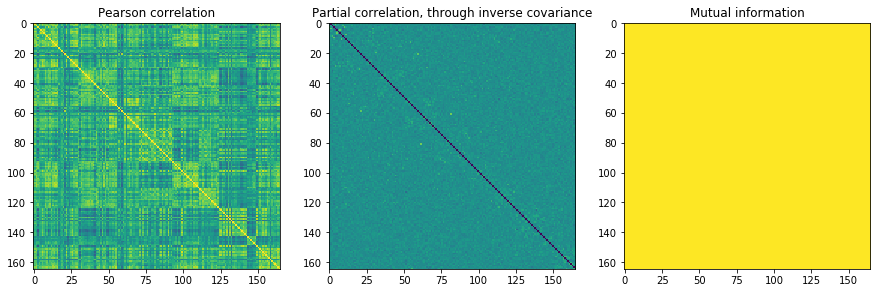

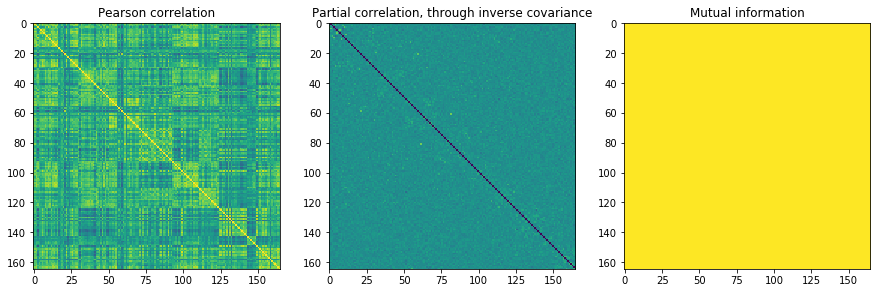

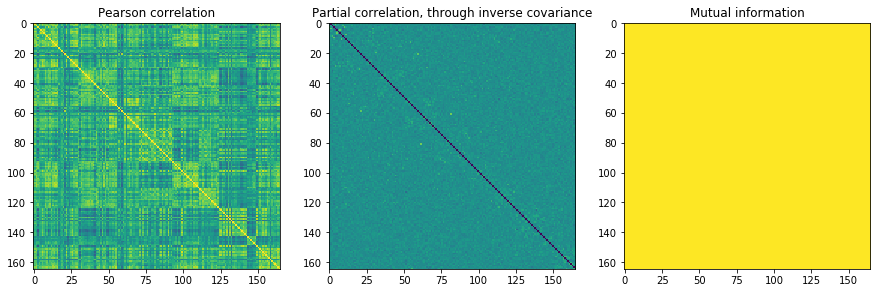

In [13]:
# plot the functional connectomes:
from sklearn import mixture
import matplotlib.mlab as mlab

f = plt.figure(figsize=(15,15))
subf1 = f.add_subplot(131)
subf1.imshow(pearsonr, clim=[-1,1])
#subf1.set_xticks(np.arange(0,len(labels)-1,1))
#subf1.set_xticklabels(labels,rotation=90)
#subf1.set_yticks(np.arange(0,len(labels)-1,1))
#subf1.set_yticklabels(labels)
plt.title('Pearson correlation')

subf2 = f.add_subplot(132)
subf2.imshow(partial_correlation2, clim=[-1,1])
plt.title('Partial correlation, through inverse covariance')

subf3 = f.add_subplot(133)
subf3.imshow(mutual_information, clim=[-1,1])
plt.title('Mutual information')
plt.show()

In [ ]:
# Mixture mdoelig for partial correlation:
partial_correlation_vec = np.reshape(partial_correlation_vec,(Nvars*Nvars,1))
weights_init=np.zeros((3,))
weights_init[0]=0.10
weights_init[1]=0.80
weights_init[2]=0.10

# Initiate the means (the pseudo-null at zero):
means_init=np.zeros((3,1))
means_init[0,0]=-0.5
means_init[1,0]=0.0 
means_init[2,0]=0.5 
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full', weights_init=weights_init, means_init=means_init).fit(partial_correlation_vec)

comp1_mean = gmm.means_[0,0]
comp2_mean = gmm.means_[1,0]
comp3_mean = gmm.means_[2,0]
comp1_std = np.sqrt(gmm.covariances_[0])[0,0]
comp2_std = np.sqrt(gmm.covariances_[1])[0,0]
comp3_std = np.sqrt(gmm.covariances_[2])[0,0]

# plot the histogram for partial correlation:
bins = np.linspace(-0.5, 0.5, 20)
plt.figure(figsize=(12,12))
plt.hist(partial_correlation_vec, bins)  
plt.show()

# plot the mixture model:
plt.figure(figsize=(12,12))
plt.title('Gaussian mixture model with two signal components', fontsize=20)
plt.yticks([])
plt.xticks([-0.50,-0.25,0.0,0.25,0.5], ['-0.50','-0.25','0.0','0.25','0.5'], fontsize=12)
x = np.linspace(-1.0, 1.0, 501)
plt.xlim([-0.5,0.5])

y1 = gmm.weights_[0]*mlab.normpdf(x, comp1_mean, comp1_std)
plt.plot(x, y1, linewidth=2.0)
y2 = gmm.weights_[1]*mlab.normpdf(x, comp2_mean, comp2_std)
plt.plot(x, y2, linewidth=2.0)
y3 = gmm.weights_[1]*mlab.normpdf(x, comp3_mean, comp3_std)
plt.plot(x, y3, linewidth=2.0)
plt.show()

print gmm.means_
print gmm.weights_